In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from classes.basic_optical_gating import BasicOpticalGating as BOG
from classes.drawer import Drawer
from classes.iplotter import iBasicOpticalGatingPlotter as IBOGP

In [3]:
v = Drawer(30, 80.135, (256, 256))
v.generate_sequence()

In [4]:
og_v = BOG()
og_v.settings["matching_method"] = "jSAD"
og_v.settings["subframe_method"] = "v-fitting"
og_v.set_sequence(v.sequence)
og_v.run()

BOG i Loading sequence...
BOG ✓ Sequence loaded with 2405 frames
BOG i Generating reference sequence from input sequence
BOG ✓ Found a period I'm happy with: 80.25050923297826
BOG i Start index: 29; Stop index: 114; Period 80.25050923297826
BOG i Calculating similarity metric using method: jSAD...
BOG ✓ SADs calculated
BOG i Calculating phases...
BOG ✓ Phases calculated
BOG i Calculating delta phases...
BOG ✓ Delta phases calculated
BOG i Unwrapping phases...
BOG ✓ Unwrapped phases calculated
BOG ✓ Finished processing sequence.


In [5]:
from classes.kalman_filter import KalmanFilter

dt = 1
x = [og_v.unwrapped_phases[0], 0]
P = np.array([[1,0],
             [0,1]])
F = np.array([[1., dt],
              [0., 1]])
q = 0.1
Q = np.array([[dt**3 / 3, dt**2 / 2],
              [dt**2 / 2, dt]]) * q
R = 0.05
F = np.array([[1, dt],
             [0, 1]])
H = np.array([[1, 0]])

kf = KalmanFilter(dt, x, P, Q, R, F, H)
kf.data = og_v.unwrapped_phases
kf.run()


In [6]:
from classes.kalman_filter import InteractingMultipleModelFilter as IMM
from classes.kalman_filter import KalmanFilter

dt = 1
x = np.array([og_v.unwrapped_phases[0], 0])
P = np.array([[1,0],
             [0,1]])
F = np.array([[1., dt],
              [0., 1]])
q = 0.1
Q = np.array([[dt**3 / 3, dt**2 / 2],
              [dt**2 / 2, dt]]) * q
R = 0.01
F = np.array([[1, dt],
             [0, 1]])
H = np.array([[1, 0]])
filter_1 = KalmanFilter(dt, x, P, Q, R, F, H)

dt = 1
x = np.array([og_v.unwrapped_phases[0], 0])
P = np.array([[1,0],
             [0,1]])
F = np.array([[1., dt],
              [0., 1]])
q = 0.1
Q = np.array([[dt**3 / 3, dt**2 / 2],
              [dt**2 / 2, dt]]) * q
R = 0.001
F = np.array([[1, dt],
             [0, 1]])
H = np.array([[1, 0]])
filter_2 = KalmanFilter(dt, x, P, Q, R, F, H)

imm = IMM(np.array([filter_1, filter_2]), np.array([0.5, 0.5]), np.array([[0.95, 0.05], [0.05, 0.95]]))
imm.data = og_v.unwrapped_phases

imm.run()


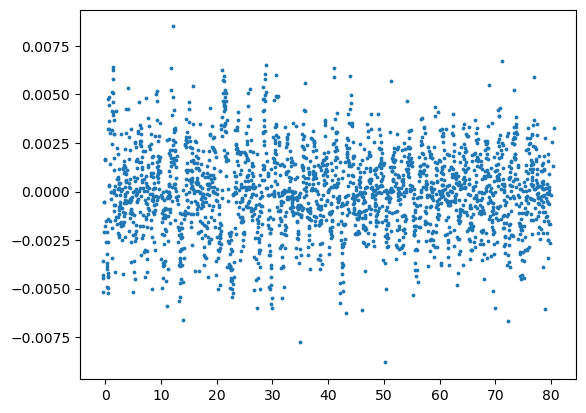

In [7]:
plt.scatter(og_v.phases, imm.xs[:,0] - og_v.unwrapped_phases, s = 3)

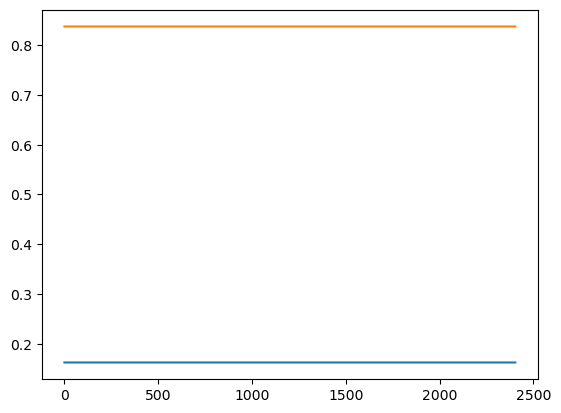

In [8]:
plt.plot(imm.mus[:,0])
plt.plot(imm.mus[:,1])
plt.show()

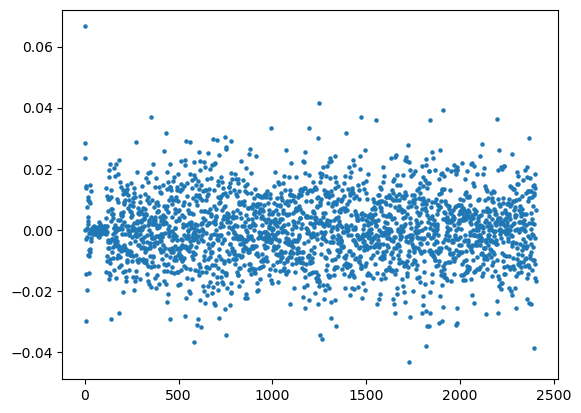

In [9]:
plt.scatter(range(og_v.unwrapped_phases.shape[0]), og_v.unwrapped_phases- kf.xs[:,0], s =  5)